In [2]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
tf.__version__


'2.9.1'

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('C:\\Users\\Saurav\\OneDrive\\Desktop\\minor_project\\eye_dataset\\train',
                                                 target_size = (24, 24),
                                                 batch_size = 32,
                                                 class_mode = 'binary',
                                                 color_mode='grayscale')

Found 1232 images belonging to 2 classes.


In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('C:\\Users\\Saurav\\OneDrive\\Desktop\\minor_project\\eye_dataset\\test',
                                            target_size = (24, 24),
                                            batch_size = 32,
                                            class_mode = 'binary',
                                            color_mode='grayscale')

Found 217 images belonging to 2 classes.


In [5]:
cnn = tf.keras.models.Sequential()

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[24, 24, 1]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu',padding='same'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))



In [7]:
cnn.add(tf.keras.layers.Flatten())

In [8]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [9]:
cnn.add(tf.keras.layers.Dropout(0.5))

In [10]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [11]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [12]:
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 30)

Epoch 1/30
39/39 [==============================] - 18s 439ms/step - loss: 0.6579 - accuracy: 0.6502 - val_loss: 0.5072 - val_accuracy: 0.9124
Epoch 2/30
39/39 [==============================] - 7s 172ms/step - loss: 0.3855 - accuracy: 0.8685 - val_loss: 0.2061 - val_accuracy: 0.9217
Epoch 3/30
39/39 [==============================] - 7s 170ms/step - loss: 0.2674 - accuracy: 0.9018 - val_loss: 0.1743 - val_accuracy: 0.9309
Epoch 4/30
39/39 [==============================] - 7s 184ms/step - loss: 0.2166 - accuracy: 0.9229 - val_loss: 0.1548 - val_accuracy: 0.9447
Epoch 5/30
39/39 [==============================] - 7s 176ms/step - loss: 0.1739 - accuracy: 0.9334 - val_loss: 0.1612 - val_accuracy: 0.9585
Epoch 6/30
39/39 [==============================] - 7s 186ms/step - loss: 0.1560 - accuracy: 0.9399 - val_loss: 0.1546 - val_accuracy: 0.9539
Epoch 7/30
39/39 [==============================] - 7s 179ms/step - loss: 0.1411 - accuracy: 0.9456 - val_loss: 0.1312 - val_accuracy: 0.9401
Epoch

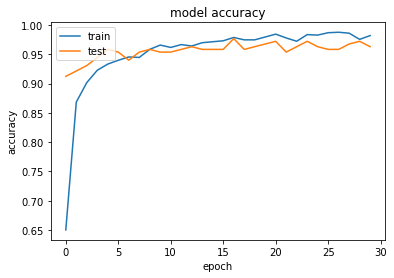

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

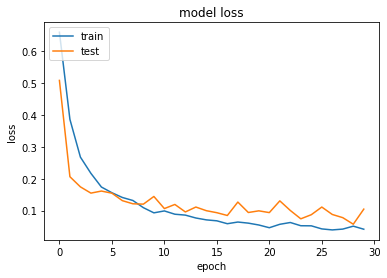

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
tf.keras.utils.plot_model(cnn, to_file='cnn_model.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [17]:
cnn.save('C:\\Users\\Saurav\\OneDrive\\Desktop\\minor_project\\DrowsinessDetection\\models\\eyemodel.h5')